<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p>
<p><font size="5" color='grey'> <b>
Unsupervised Learning - KMeans & DBSCAN - Body Performance
</b></font> </br></p>

---


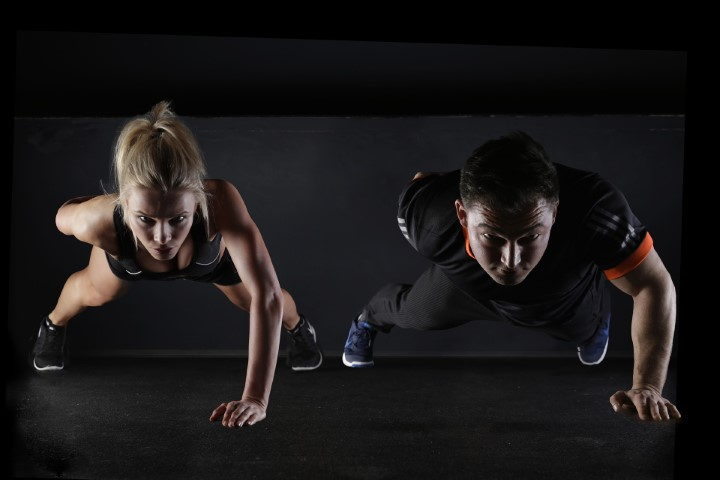

Bild von <a href="https://pixabay.com/de/users/5132824-5132824/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=2264825">5132824</a> auf <a href="https://pixabay.com/de//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=2264825">Pixabay</a>

# **1 <font color='orange'>|</font> Understand**
***



<p><font color='black' size="5">
Warnungen ausstellen
</font></p>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<p><font color='black' size="5">
Anwendungsfall
</font></p>


Daten, die von der National Sports Promotion Foundation zum Gedenken an die Olympischen Spiele in Seoul verwaltet werden. Die Daten beinhatlten den Leistungsgrad, Altersgruppe, Größe, Gewicht, Sit-up, BMI und Weitsprung an Ort und Stelle, etc.  


[DataSet](https://www.kaggle.com/datasets/kukuroo3/body-performance-data)   
[Info](https://www.kaggle.com/datasets/kukuroo3/body-performance-data)   
[Quelle](https://www.bigdata-culture.kr/bigdata/user/data_market/detail.do?id=ace0aea7-5eee-48b9-b616-637365d665c1)



**Übungen:**
+ gripForce: Griffkraft
+ sit and bend forward_cm: sitzend, Beuge nach vorne
+ Sit-up: Crunch, Bauchpresse (liegend, Beine angewinkelt, Beuge nach vorne)
+ broad jump_cm: Weitsprung aus dem Stand

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# import pandas as pd
# df = pd.read_csv('/content/drive/MyDrive/ml-kurs/02 data/BodyPerformance.csv')

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ralf-42/ml-kurs/main/02%20data/BodyPerformance.csv')

In [ ]:
label = 'class'
features = [n for n in df.columns if n != label]

In [ ]:
df_m = df[df.gender == 'M' ]
df_f = df[df.gender == 'F' ]

In [ ]:
# target = df_m[label].copy()
# data = df_m[features].copy()
# target = df_f[label].copy()
# data = df_f[features].copy()
target = df[label].copy()
data = df[features].copy()

<p><font color='black' size="5">
EDA (Exploratory Data Analysis) mit Pandas
</font></p>


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.1+ MB


In [ ]:
data.dtypes

age                        float64
gender                      object
height_cm                  float64
weight_kg                  float64
body fat_%                 float64
diastolic                  float64
systolic                   float64
gripForce                  float64
sit and bend forward_cm    float64
sit-ups counts             float64
broad jump_cm              float64
dtype: object

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,13393.0,36.775106,13.625639,21.0,25.0,32.0,48.0,64.0
height_cm,13393.0,168.559807,8.426583,125.0,162.4,169.2,174.8,193.8
weight_kg,13393.0,67.447316,11.949666,26.3,58.2,67.4,75.3,138.1
body fat_%,13393.0,23.240165,7.256844,3.0,18.0,22.8,28.0,78.4
diastolic,13393.0,78.796842,10.742033,0.0,71.0,79.0,86.0,156.2
systolic,13393.0,130.234817,14.713954,0.0,120.0,130.0,141.0,201.0
gripForce,13393.0,36.963877,10.624864,0.0,27.5,37.9,45.2,70.5
sit and bend forward_cm,13393.0,15.209268,8.456677,-25.0,10.9,16.2,20.7,213.0
sit-ups counts,13393.0,39.771224,14.276698,0.0,30.0,41.0,50.0,80.0
broad jump_cm,13393.0,190.129627,39.868000,0.0,162.0,193.0,221.0,303.0


In [ ]:
data.corr()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
age,1.000000,-0.293980,-0.099966,0.242302,0.158508,0.211167,-0.179583,-0.070033,-0.544581,-0.435172
height_cm,-0.293980,1.000000,0.734909,-0.515440,0.145933,0.210186,0.735024,-0.221970,0.500424,0.674589
weight_kg,-0.099966,0.734909,1.000000,-0.084065,0.262317,0.338943,0.700119,-0.296249,0.294899,0.479564
body fat_%,0.242302,-0.515440,-0.084065,1.000000,0.048059,-0.030376,-0.541788,-0.071225,-0.608912,-0.673273
diastolic,0.158508,0.145933,0.262317,0.048059,1.000000,0.676309,0.202062,-0.072098,0.016547,0.097243
systolic,0.211167,0.210186,0.338943,-0.030376,0.676309,1.000000,0.286012,-0.082434,0.056276,0.152894
gripForce,-0.179583,0.735024,0.700119,-0.541788,0.202062,0.286012,1.000000,-0.112577,0.576669,0.746853
sit and bend forward_cm,-0.070033,-0.221970,-0.296249,-0.071225,-0.072098,-0.082434,-0.112577,1.000000,0.177153,0.026487
sit-ups counts,-0.544581,0.500424,0.294899,-0.608912,0.016547,0.056276,0.576669,0.177153,1.000000,0.748273
broad jump_cm,-0.435172,0.674589,0.479564,-0.673273,0.097243,0.152894,0.746853,0.026487,0.748273,1.000000


In [ ]:
target.value_counts()

C    3349
D    3349
A    3348
B    3347
Name: class, dtype: int64

# **2 <font color='orange'>|</font> Prepare**

---

<p><font color='black' size="5">
Datentyp ermitteln
</font></p>

In [ ]:
all_col = data.columns
num_col = data.select_dtypes(include='number').columns
cat_col = data.select_dtypes(exclude='number').columns

<p><font color='black' size="5">
Codierung
</font></p>


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
data[cat_col] = OrdinalEncoder().fit_transform(data[cat_col])

<p><font color='black' size="5">
Skalierung
</font></p>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data[num_col] = MinMaxScaler().fit_transform(data[num_col])

# **3 <font color='orange'>|</font> Modeling**
---

 <p><font color='black' size="5">
Modellauswahl & Training
</font></p>

In [ ]:
# from sklearn.cluster import KMeans
# model = KMeans(n_clusters = 8, n_init=100, max_iter=300, tol=1e-4, algorithm='auto', random_state=42)
# model.fit(data)

In [ ]:
from sklearn.cluster import DBSCAN
model = DBSCAN()
model.fit(data)

DBSCAN()

In [ ]:
target_pred = pd.DataFrame(model.labels_)
target_pred.value_counts()

 0    8464
 1    4925
-1       4
dtype: int64

# **4 <font color='orange'>|</font> Evaluate**
---


**Bewertung ohne Vergleichdaten:**   
+ Der Silhouettenkoeffizient *s* gibt an, wie gut die Zuordnung der einzelnen Mitglieder zu den Clustern ist.
+ Die Punktzahl ist zwischen -1 für falsches Clustering und +1 für sehr dichtes Clustering begrenzt.
+ Werte um Null zeigen überlappende Cluster an.
+ Die Punktzahl ist höher, wenn Cluster dicht und gut getrennt sind, was sich auf ein Standardkonzept eines Clusters bezieht.

    
**Bewertung mit Vergleichsdaten:**   
+ Homogenität : Jeder Cluster enthält nur Mitglieder einer einzigen Klasse.
+ Vollständigkeit : Alle Mitglieder einer bestimmten Klasse werden demselben Cluster zugeordnet.
+ Beide sind unten durch 0,0 und oben durch 1,0 begrenzt (höher ist besser).

<p><font color='black' size="5">
Silhouettenkoeffizient
</font></p>

In [ ]:
from sklearn.metrics import silhouette_score
s_score = silhouette_score(data, model.labels_, metric='euclidean')
print(f'Silhouettenkoeffizient: {s_score:0.2f}')

Silhouettenkoeffizient: 0.53


<p><font color='black' size="5">
Homogenität & Vollständigkeit
</font></p>

In [ ]:
from sklearn.metrics import homogeneity_score, completeness_score
print ('Metriken:')
n_clusters_ = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
n_noise_ = list(model.labels_).count(-1)
h_score = homogeneity_score(target, model.labels_)
c_score = completeness_score(target, model.labels_)

print(f'Erwartete Zahl von Clustern: {n_clusters_}')
print(f'Erwartete Zahl von noise points: {n_noise_}')
print(f'Homogenität: {h_score:0.2f}')
print(f'Vollständigkeit: {c_score:0.2f}')

Metriken:
Erwartete Zahl von Clustern: 2
Erwartete Zahl von noise points: 4
Homogenität: 0.00
Vollständigkeit: 0.01


Visualize

In [ ]:
# pd.DataFrame(model.labels_).value_counts()

In [ ]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(model, colors='reset')
visualizer.fit(data)

<p><font color='black' size="5">
Streupunktdiagramme
</font></p>

PCA

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
data_pca = pd.DataFrame(data_pca)
data_pca.columns =['PCA1', 'PCA2']

PCA Strupunktdiagramme

In [ ]:
import plotly.express as px
import numpy as np

data_pca['class real'] = np.array(target)
data_pca['class pred'] = np.array(target_pred)

plot_1 = px.scatter(data_pca, x = 'PCA1',
				y = 'PCA2',
				color='class real',
				symbol = 'class real')
plot_2 = px.scatter(data_pca, x = 'PCA1',
				y = 'PCA2',
				color='class pred',
				symbol = 'class pred')

plot_1.update_layout(height=400, width=600, title_text="Performance Class real")
plot_2.update_layout(height=400, width=600, title_text="Performance Class pred")

plot_1.show()
plot_2.show()

# **5 <font color='orange'>|</font> Deploy**
---